In [5]:
# Which Actors appear most frequently in high-rated movies (e.g., IMDb ratings > 7)

# Import Libraries
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import ast
from pprint import pprint
from config import tmdb_api_key
from config import omdb_api_key

# TMDB Setup 

# t_api_key = tmdb_api_key
# t_base_url = "https://api.themoviedb.org/3/discover/movie"

# Import The Movie Dataset CSVs into Dataframes
credits_df = pd.read_csv("Resources/credits.csv")
keywords_df = pd.read_csv("Resources/keywords.csv")
links_small_df = pd.read_csv("Resources/links_small.csv")
links_df = pd.read_csv("Resources/links.csv")
movies_df = pd.read_csv("Resources/movies_metadata.csv")
ratings_small_df = pd.read_csv("Resources/ratings_small.csv")
ratings_df = pd.read_csv("Resources/ratings.csv")



C:\Users\flash\AppData\Local\Temp\ipykernel_40264\1853352243.py:23: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("Resources/movies_metadata.csv")


In [6]:
# Dropping unneeded columns for movie dataframe
clean_movies_df = movies_df.drop(columns=["adult", 
                                          "belongs_to_collection", 
                                          "budget", 
                                          "genres", 
                                          "homepage", 
                                          "original_language", 
                                          "overview",
                                          "popularity",
                                          "poster_path",
                                          "production_companies",
                                          "production_countries",
                                          "revenue", 
                                          "runtime", 
                                          "spoken_languages", 
                                          "status", 
                                          "tagline", 
                                          "video"])

# Dropping Cast Column
clean_credits_df = credits_df.drop(columns = ["crew"])


In [7]:
pd.options.display.max_colwidth = 500 
clean_credits_df.head()

,cast,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f8...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75077a8d', 'gender': 2, 'id': 6837, 'name': 'Walter Matthau', 'order': 0, 'profile_path': '/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg'}, {'cast_id': 3, 'character': 'John Gustafson', 'credit_id': '52fe466a9251416c75077a91', 'gender': 2, 'id': 3151, 'name': 'Jack Lemmon', 'order': 1, 'profile_path': '/chZmNRYMtqkiDlatprGDH4BzGqG.jpg'}, {'cast_id': 4, 'character': 'Ariel Gustafson', 'credit_id': '52fe466a9251416c75077a95', 'gender...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': '52fe44779251416c91011aad', 'gender': 1, 'id': 8851, 'name': 'Whitney Houston', 'order': 0, 'profile_path': '/69ouDnXnmklYPr4sMJXWKYz81AL.jpg'}, {'cast_id': 2, 'character': ""Bernadine 'Bernie' Harris"", 'credit_id': '52fe44779251416c91011ab1', 'gender': 1, 'id': 9780, 'name': 'Angela Bassett', 'order': 1, 'profile_path': '/tHkgSzhEuJKp5hqp0DZLad8HNZ9.jpg'}, {'cast_id': 3, 'character': ""Gloria 'Glo' Matthews"", 'credit_id': ...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251416c75039eb9', 'gender': 2, 'id': 67773, 'name': 'Steve Martin', 'order': 0, 'profile_path': '/rI2EMvkfKKPKa5z0nM2pFVBtUyO.jpg'}, {'cast_id': 2, 'character': 'Nina Banks', 'credit_id': '52fe44959251416c75039ebd', 'gender': 1, 'id': 3092, 'name': 'Diane Keaton', 'order': 1, 'profile_path': '/fzgUMnbOkxC6E3EFcYHWHFaiKyp.jpg'}, {'cast_id': 3, 'character': 'Franck Eggelhoffer', 'credit_id': '52fe44959251416c75039ec1', 'gender...",11862


In [8]:
# Converting 'cast' column from strings to Python objects
clean_credits_df['cast'] = clean_credits_df['cast'].apply(ast.literal_eval)

In [9]:
# Extract actor names
actor_names_df = clean_credits_df['cast'].apply(lambda x: [person['name'] for person in x])

# Setting the max number of actors per movie to 5
max_actors = 5

# Filling in list with "None" to make sure all rows have the same number of actors
actor_names_df = actor_names_df.apply(lambda x: x[:max_actors] + [None] * (max_actors - len(x)))

# Inserting actors in their own column
actor_columns = pd.DataFrame(actor_names_df.tolist(), 
                             columns=[f'actor_{i+1}' for i in range(max_actors)])

# Aligning indexes
actor_columns.index = clean_credits_df.index

# Merging the new actor columns with the original DataFrame
actor_results_df = pd.concat([clean_credits_df, actor_columns], axis=1)

# Removing old cast column
actor_results_df = actor_results_df.drop(columns=['cast'])

# Print the result
actor_results_df.head()


,id,actor_1,actor_2,actor_3,actor_4,actor_5
0,862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn
1,8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt
2,15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah
3,31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines
4,11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern


In [10]:
# Cleaning up invalid entries
clean_movies_df['id'] = pd.to_numeric(clean_movies_df['id'], errors='coerce')
actor_results_df['id'] = pd.to_numeric(actor_results_df['id'], errors='coerce')
clean_movies_df = clean_movies_df.dropna(subset=['id'])
actor_results_df = actor_results_df.dropna(subset=['id'])

# Setting id column to int
clean_movies_df['id'] = clean_movies_df['id'].astype(int)
actor_results_df['id'] = actor_results_df['id'].astype(int)

# Merge
merged_movie_df = pd.merge(clean_movies_df, actor_results_df, how='left', on='id')
merged_movie_df.head()

,id,imdb_id,original_title,release_date,title,vote_average,vote_count,actor_1,actor_2,actor_3,actor_4,actor_5
0,862,tt0114709,Toy Story,1995-10-30,Toy Story,7.7,5415.0,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn
1,8844,tt0113497,Jumanji,1995-12-15,Jumanji,6.9,2413.0,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt
2,15602,tt0113228,Grumpier Old Men,1995-12-22,Grumpier Old Men,6.5,92.0,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah
3,31357,tt0114885,Waiting to Exhale,1995-12-22,Waiting to Exhale,6.1,34.0,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines
4,11862,tt0113041,Father of the Bride Part II,1995-02-10,Father of the Bride Part II,5.7,173.0,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern


In [11]:
# Putting the 5 actors into their own column with a repeating ID
merged_movie_df = merged_movie_df.melt(
    id_vars=['id', 'imdb_id', 'original_title', 'release_date', 'title', 'vote_average', 'vote_count'], 
    value_vars=['actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5'],  
    value_name='actor'  
)

# Applying Vote Average Filter
filtered_merged_movie_df = merged_movie_df[merged_movie_df['vote_average'] > 7]
actor_appearance_counts = filtered_merged_movie_df['actor'].value_counts()

# Display the top 20 actors 
actor_appearance_counts_df = actor_appearance_counts.reset_index()
actor_appearance_counts_df.columns = ['actor', 'appearance_count']
actor_appearance_counts_df.rename(columns={'actor': 'Actor', 'appearance_count': '# of Appearances'}, inplace=True)
actor_appearance_counts_df.head(20)

,Actor,# of Appearances
0,Robert De Niro,26
1,Bette Davis,26
2,Toshirō Mifune,23
3,Tom Hanks,21
4,Christopher Plummer,20
5,James Stewart,20
6,Werner Herzog,20
7,Humphrey Bogart,19
8,Clint Eastwood,19
9,Catherine Deneuve,19


In [12]:
# Double checking our results
filtered_actor = merged_movie_df[
    (merged_movie_df['actor'] == 'Robert De Niro') & (merged_movie_df['vote_average'] > 7)
     ]
filtered_actor.sort_values(by='vote_average', ascending=False)

,id,imdb_id,original_title,release_date,title,vote_average,vote_count,variable,actor
20567,103162,tt0175844,Lenny Bruce: Swear to Tell the Truth,1998-10-21,Lenny Bruce: Swear to Tell the Truth,9.5,1.0,actor_1,Robert De Niro
137798,240,tt0071562,The Godfather: Part II,1974-12-20,The Godfather: Part II,8.3,3418.0,actor_4,Robert De Niro
1187,311,tt0087843,Once Upon a Time in America,1984-02-16,Once Upon a Time in America,8.3,1104.0,actor_1,Robert De Niro
1173,769,tt0099685,GoodFellas,1990-09-12,GoodFellas,8.2,3211.0,actor_1,Robert De Niro
109,103,tt0075314,Taxi Driver,1976-02-07,Taxi Driver,8.1,2632.0,actor_1,Robert De Niro
1221,11778,tt0077416,The Deer Hunter,1978-12-08,The Deer Hunter,7.8,943.0,actor_1,Robert De Niro
15,524,tt0112641,Casino,1995-11-22,Casino,7.8,1343.0,actor_1,Robert De Niro
1188,1578,tt0081398,Raging Bull,1980-11-14,Raging Bull,7.7,968.0,actor_1,Robert De Niro
45544,949,tt0113277,Heat,1995-12-15,Heat,7.7,1886.0,actor_2,Robert De Niro
46699,68,tt0088846,Brazil,1985-02-20,Brazil,7.6,877.0,actor_2,Robert De Niro


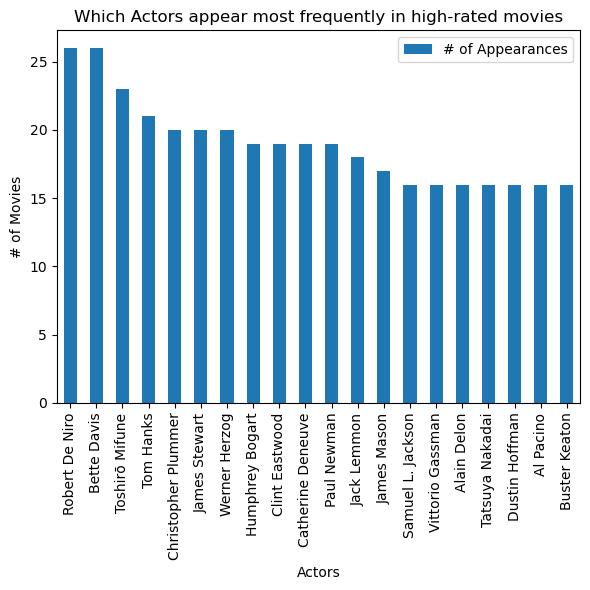

In [18]:
# Visualization of Most appearances in movies with a score of 7+ IMDB
actor_appearance_counts_df.head(20).plot.bar(x='Actor', y='# of Appearances', figsize=(6,6), width=0.5)
plt.title('Which Actors appear most frequently in high-rated movies')
plt.xlabel('Actors')
plt.ylabel('# of Movies')
plt.tight_layout()
plt.show()

In [19]:
# Setting OMDB query param for looking up IMDb IDs
omdb_api_key = "XXXXXXXX"
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=" + omdb_api_key

In [26]:
# Implementing IMDb ID from Dataframe into OMDb API call for Paranormal Activity
imdb_id = filtered_actor.loc[filtered_actor['title'] == 'The Godfather: Part II', 'imdb_id'].values[0]
response = requests.get(url + imdb_id + api_key)

# Converting the response to JSON, and printing the result.
data = response.json()

In [27]:
# Print information about a movie from Robert De Niro

movie_actors = data['Actors'].split(", ")
target_movie_actor = movie_actors[1]
movie_title = data['Title']
movie_actor = data['Actors'][1]
movie_boxoffice = data['BoxOffice']
imdb_rating = filtered_actor.loc[filtered_actor['title'] == 'The Godfather: Part II', 'vote_average'].values[0]
release_date = data['Released']

print(f'{target_movie_actor} starred in the movie, {movie_title}. It was released in {release_date} and it grossed a box office of {movie_boxoffice} with an IMDb rating of {imdb_rating}.')


Robert De Niro starred in the movie, The Godfather Part II. It was released in 18 Dec 1974 and it grossed a box office of $47,834,595 with an IMDb rating of 8.3.
